### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [2290]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px
from IPython.display import Image

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2293]:
data = pd.read_csv('data/coupons.csv')

In [2295]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [2298]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [2300]:
# rename passanger to passenger
data = data.rename(columns = {"passanger":"passenger"})

In [2302]:
# Data set size
data.shape

(12684, 26)

In [2304]:
# find columns with missing value
data.isnull().sum().sort_values()

destination                 0
direction_same              0
toCoupon_GEQ25min           0
toCoupon_GEQ15min           0
toCoupon_GEQ5min            0
income                      0
direction_opp               0
education                   0
has_children                0
occupation                  0
age                         0
gender                      0
expiration                  0
coupon                      0
time                        0
temperature                 0
weather                     0
passenger                   0
maritalStatus               0
Y                           0
Bar                       107
RestaurantLessThan20      130
CarryAway                 151
Restaurant20To50          189
CoffeeHouse               217
car                     12576
dtype: int64

In [2306]:
# Check different unique column values and how many occurances for each. Also, how many corresponding missing value occurances.
for column in data.columns:
    print(f"Value counts for column {column}:")
    print(data[column].value_counts())
    print(f"Missing values for column {column}: {data[column].isnull().sum()}")
    print("\n")

Value counts for column destination:
destination
No Urgent Place    6283
Home               3237
Work               3164
Name: count, dtype: int64
Missing values for column destination: 0


Value counts for column passenger:
passenger
Alone        7305
Friend(s)    3298
Partner      1075
Kid(s)       1006
Name: count, dtype: int64
Missing values for column passenger: 0


Value counts for column weather:
weather
Sunny    10069
Snowy     1405
Rainy     1210
Name: count, dtype: int64
Missing values for column weather: 0


Value counts for column temperature:
temperature
80    6528
55    3840
30    2316
Name: count, dtype: int64
Missing values for column temperature: 0


Value counts for column time:
time
6PM     3230
7AM     3164
10AM    2275
2PM     2009
10PM    2006
Name: count, dtype: int64
Missing values for column time: 0


Value counts for column coupon:
coupon
Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Res

3. Decide what to do about your missing data -- drop, replace, other...

In [2309]:
# Drop column - car (majority of rows are blank and the remaining ones are 22/21), toCoupon_GEQ5min (all rows have same value 1)
data = data.drop (columns = ['car', 'toCoupon_GEQ5min'])

# Drop column direction_opp as the value can be interpreted from column direction_same. 
#Value 1 is same direction and 0 is opposite direction
data = data.drop (columns = ['direction_opp'])

In [2311]:
data.shape

(12684, 23)

In [2313]:
# Update rows with missing data. Since the #s are fairly small, we can assume the lowest possible value such as "never" for these
# Bar                       107
# RestaurantLessThan20      130
# CarryAway                 151
# Restaurant20To50          189
# CoffeeHouse               217

In [2315]:
# Restaurant20To50  - Update null values with "never"
data["Restaurant20To50"].fillna("never", inplace = True)
data["Restaurant20To50"].value_counts()

# Replace less1 with "never"
data["Restaurant20To50"] = data["Restaurant20To50"].str.replace("less1","never")
data["Restaurant20To50"].value_counts()

Restaurant20To50
never    8402
1~3      3290
4~8       728
gt8       264
Name: count, dtype: int64

In [2317]:
# CarryAway  - Update null values with "never"
data["CarryAway"].fillna("never", inplace = True)
data["CarryAway"].value_counts()

# Replace less1 with "never"
data["CarryAway"] = data["CarryAway"].str.replace("less1","never")
data["CarryAway"].value_counts()

CarryAway
1~3      4672
4~8      4258
never    2160
gt8      1594
Name: count, dtype: int64

In [2319]:
# RestaurantLessThan20  - Update null values with "never"
data["RestaurantLessThan20"].fillna("never", inplace = True)
data["RestaurantLessThan20"].value_counts()

# Replace less1 with "never"
data["RestaurantLessThan20"] = data["RestaurantLessThan20"].str.replace("less1","never")
data["RestaurantLessThan20"].value_counts()

RestaurantLessThan20
1~3      5376
4~8      3580
never    2443
gt8      1285
Name: count, dtype: int64

In [2321]:
# Bar  - Update null values with "never"
data["Bar"].fillna("never", inplace = True)
data["Bar"].value_counts()

# Replace less1 with "never"
data["Bar"] = data["Bar"].str.replace("less1","never")
data["Bar"].value_counts()

Bar
never    8786
1~3      2473
4~8      1076
gt8       349
Name: count, dtype: int64

In [2323]:
# CoffeeHouse - Update null values with "never"
data["CoffeeHouse"].fillna("never", inplace = True)
data["CoffeeHouse"].value_counts()

# Replace less1 with "never"
data["CoffeeHouse"] = data["CoffeeHouse"].str.replace("less1","never")
data["CoffeeHouse"].value_counts()

CoffeeHouse
never    6564
1~3      3225
4~8      1784
gt8      1111
Name: count, dtype: int64

In [2325]:
# Check if all null values have been filled
data.isnull().sum().sort_values()

destination             0
toCoupon_GEQ25min       0
toCoupon_GEQ15min       0
Restaurant20To50        0
RestaurantLessThan20    0
CarryAway               0
CoffeeHouse             0
Bar                     0
income                  0
occupation              0
direction_same          0
education               0
maritalStatus           0
age                     0
gender                  0
expiration              0
coupon                  0
time                    0
temperature             0
weather                 0
passenger               0
has_children            0
Y                       0
dtype: int64

4. What proportion of the total observations chose to accept the coupon? 



In [2328]:
# Check the unique values for column Y and their respective counts
data["Y"].value_counts()

# Total # of observations
data.shape[0]

# Calculate the proportion when value of Y is 1 (i.e. coupon accepted)
Coupon_acceptance = data["Y"].value_counts()[1] / data.shape[0]
Coupon_acceptance.round(4)

0.5684

5. Use a bar plot to visualize the `coupon` column.

<Axes: xlabel='coupon'>

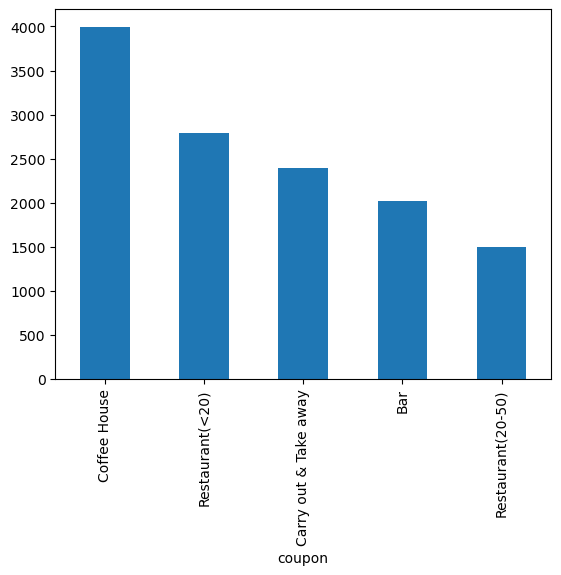

In [2331]:
data["coupon"].value_counts().plot(kind = "bar")

6. Use a histogram to visualize the temperature column.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Axes: xlabel='temperature', ylabel='Count'>

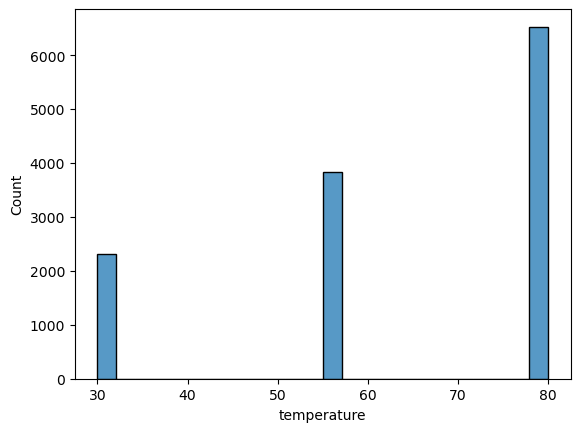

In [2334]:
sns.histplot(data, x = "temperature")

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [2338]:
data_bar = data[data["coupon"].str.contains("Bar")]
data_bar.shape

(2017, 23)

2. What proportion of bar coupons were accepted?


In [2341]:
# Check the unique values for column Y and their respective counts

data_bar["Y"].value_counts()

# Total # of observations
data_bar.shape[0]

# Calculate the proportion when value of Y is 1 (i.e. coupon accepted)
Coupon_acceptance = data_bar["Y"].value_counts()[1] / data_bar.shape[0]
print(f"Proportion of bar coupons that were accepted: {Coupon_acceptance.round(4)*100}%")

Proportion of bar coupons that were accepted: 41.0%


In [2343]:
# Overall coupon acceptance rates for different coupon types

acceptance_rate = data.groupby('coupon').apply(lambda x: ((x['Y'].sum() / len(x))*100).round(2)).reset_index(name='acceptance_rate')
print(acceptance_rate)

                  coupon  acceptance_rate
0                    Bar            41.00
1  Carry out & Take away            73.55
2           Coffee House            49.92
3      Restaurant(20-50)            44.10
4        Restaurant(<20)            70.71


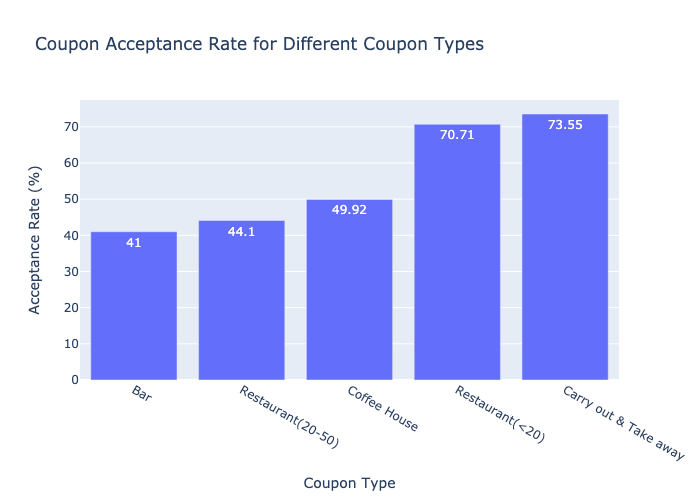

In [2345]:
# Visualization

fig1 = px.bar(acceptance_rate, x='coupon', y='acceptance_rate', text='acceptance_rate', 
           labels={'acceptance_rate': 'Acceptance Rate (%)', 'coupon': 'Coupon Type'},
           title = "Coupon Acceptance Rate for Different Coupon Types").update_xaxes(categoryorder='total ascending')
fig1.write_image("./images/coupons/fig1.png")
Image(filename="./images/coupons/fig1.png")

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


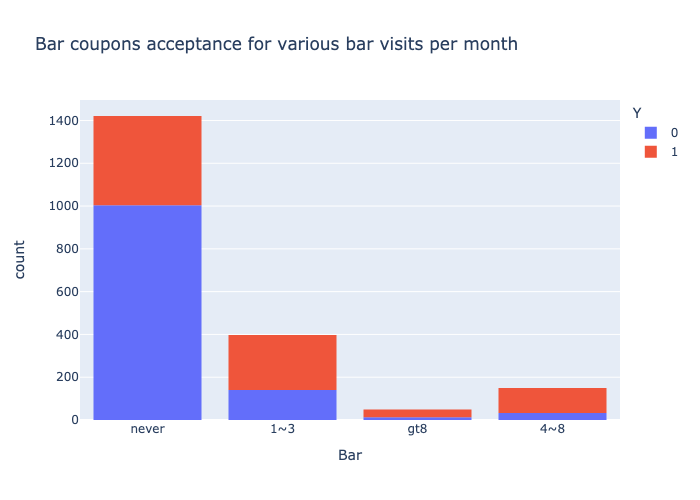

In [2348]:
fig2 = px.histogram(data_bar, x = "Bar", color = "Y", title = "Bar coupons acceptance for various bar visits per month")
fig2.write_image("./images/coupons/fig2.png")
Image(filename="./images/coupons/fig2.png")

Acceptance rate of those who went to bar 3 or fewer times a month: 64.74%
Acceptance rate of those who went to bar 4 to 8 times a month: 78.0%
Acceptance rate of those who went to bar more than 8 times a month: 73.47%
Acceptance rate of those who went to bar 4 or more times a month: 76.88%
Reconfirming - Acceptance rate of those who went to bar 4 or more times a month: 76.88%


[Text(0, 0, '64.74'),
 Text(0, 0, '78'),
 Text(0, 0, '73.47'),
 Text(0, 0, '76.88')]

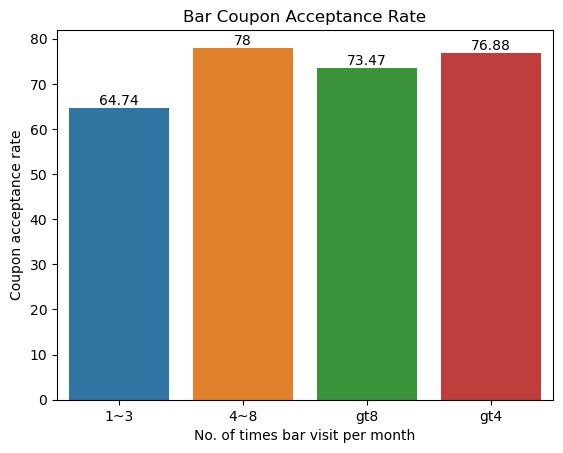

In [2350]:
# Those who went to bar 3 or fewer times and accepted coupon
a = (data_bar["Bar"].str.contains("1~3") & data_bar["Y"] == 1).sum()

# Those who went to bar 3 or fewer times
b = data_bar["Bar"].str.contains("1~3").sum()

# Acceptance rate of those who went to bar 3 or fewer times a month
c = (a/b).round(4)*100
print(f"Acceptance rate of those who went to bar 3 or fewer times a month: {c}%")

###

# Those who went to bar 4 to 8 times and accepted coupon
d = (data_bar["Bar"].str.contains("4~8") & data_bar["Y"] == 1).sum()

# Those who went to bar 4 to 8 times
e = data_bar["Bar"].str.contains("4~8").sum()

# Acceptance rate of those who went to bar 4 to 8 times a month
f = (d/e).round(4)*100
print(f"Acceptance rate of those who went to bar 4 to 8 times a month: {f}%")

###

# Those who went to bar more than 8 times and accepted coupon
g = (data_bar["Bar"].str.contains("gt8") & data_bar["Y"] == 1).sum()

# Those who went to bar more than 8 times
h = data_bar["Bar"].str.contains("gt8").sum()

# Acceptance rate of those who went to bar more than 8 times a month
i = (g/h).round(4)*100
print(f"Acceptance rate of those who went to bar more than 8 times a month: {i}%")

###

# Acceptance rate of those who went to bar 4 or more times a month
j = (((d+g)/(e+h))*100).round(2)
print(f"Acceptance rate of those who went to bar 4 or more times a month: {j}%")

# Alternatively, we can use these:
k = data_bar["Bar"].str.contains("|".join(["4~8", "gt8"])).sum()

l = (data_bar["Bar"].str.contains("|".join(["4~8", "gt8"])) & data_bar["Y"] == 1).sum()

m = ((l/k)*100).round(2)
print(f"Reconfirming - Acceptance rate of those who went to bar 4 or more times a month: {m}%")

###

# Visualization
temp_data = [['1~3',c],['4~8', f],['gt8', i], ['gt4',j]]
temp_df = pd.DataFrame(temp_data, columns = ['No. of times bar visit per month','Coupon acceptance rate'])
#temp_df.plot(kind = "bar", x = 'No. of times bar visit per month', y = "Coupon acceptance rate")
ax = sns.barplot(data = temp_df, x = 'No. of times bar visit per month', y = "Coupon acceptance rate")
plt.title("Bar Coupon Acceptance Rate")
ax.bar_label(ax.containers[0])

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [2353]:
data_bar["age"].value_counts()

age
21         417
26         395
31         339
50plus     283
36         209
41         178
46         109
below21     87
Name: count, dtype: int64

Acceptance rate of those who went to bar more than once a month & over 25: 69.52%
Acceptance rate of those who went to bar more than once a month & below 25: 67.05%


[Text(0, 0, '69.52'), Text(0, 0, '67.05')]

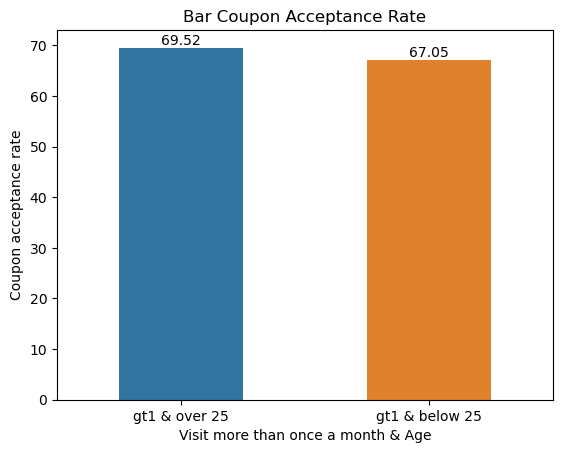

In [2355]:
# Those who went to bar more than once a month & over 25
n_gt25 = (data_bar["Bar"].str.contains("|".join(["1~3","4~8", "gt8"])) & data_bar["age"].str.contains("|".join(["26","31","36","41","46","50plus"]))).sum()

# Those who went to bar more than once a month, accepted coupon and over 25
o_gt25 = (data_bar["Bar"].str.contains("|".join(["1~3", "4~8", "gt8"])) & data_bar["age"].str.contains("|".join(["26","31","36","41","46","50plus"])) & data_bar["Y"] == 1).sum()

# Acceptance rate of those who went to bar more than once a month and over 25
p_gt25 = ((o_gt25/n_gt25)*100).round(2)
print(f"Acceptance rate of those who went to bar more than once a month & over 25: {p_gt25}%")

###

# Those who went to bar more than once a month & under 25
n_lt25 = (data_bar["Bar"].str.contains("|".join(["1~3","4~8", "gt8"])) & data_bar["age"].str.contains("|".join(["below21","21"]))).sum()

# Those who went to bar more than once a month, accepted coupon and under 25
o_lt25 = (data_bar["Bar"].str.contains("|".join(["1~3", "4~8", "gt8"])) & data_bar["age"].str.contains("|".join(["below21","21"])) & data_bar["Y"] == 1).sum()

# Acceptance rate of those who went to bar more than once a month and under 25
p_lt25 = ((o_lt25/n_lt25)*100).round(2)
print(f"Acceptance rate of those who went to bar more than once a month & below 25: {p_lt25}%")

# Visualization
temp_data = [['gt1 & over 25',p_gt25],['gt1 & below 25', p_lt25]]
temp_df = pd.DataFrame(temp_data, columns = ['Visit more than once a month & Age','Coupon acceptance rate'])
ax = sns.barplot(data = temp_df, x = 'Visit more than once a month & Age', y = "Coupon acceptance rate", width = 0.5)
plt.title("Bar Coupon Acceptance Rate")
ax.bar_label(ax.containers[0])

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [2358]:
data_bar["passenger"].value_counts()

passenger
Alone        1200
Friend(s)     337
Partner       274
Kid(s)        206
Name: count, dtype: int64

In [2360]:
data_bar["occupation"].value_counts()

occupation
Unemployed                                   301
Student                                      251
Computer & Mathematical                      232
Sales & Related                              178
Education&Training&Library                   140
Management                                   119
Office & Administrative Support              105
Arts Design Entertainment Sports & Media     100
Business & Financial                          89
Retired                                       75
Food Preparation & Serving Related            48
Community & Social Services                   44
Healthcare Support                            44
Healthcare Practitioners & Technical          41
Transportation & Material Moving              35
Legal                                         34
Architecture & Engineering                    27
Personal Care & Service                       27
Protective Service                            27
Construction & Extraction                     24
Life Phys

Acceptance rate of those who went to bar more than once a month, passengers that were not a kid and with occupations other than farming, fishing, forestry: 71.79%


[Text(0, 0, '69.52'), Text(0, 0, '67.05'), Text(0, 0, '71.79')]

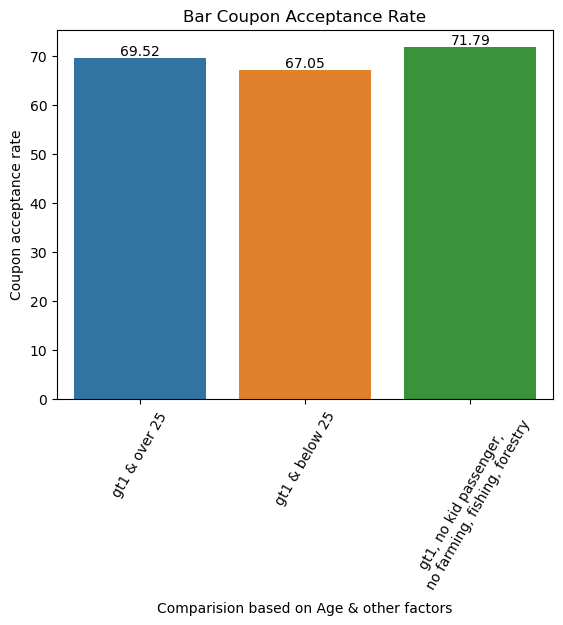

In [2362]:
# Those who went to bar more than once a month & had passengers that were not a kid and with occupations other than farming, fishing, forestry
q = (data_bar["Bar"].str.contains("|".join(["1~3","4~8", "gt8"])) 
        & data_bar["passenger"].str.contains("|".join(["Friend\(s\)","Partner"]))
        & ~data_bar["occupation"].str.contains("Farming Fishing & Forestry")).sum()

# Those who went to bar more than once a month, accepted coupon, & had passengers that were not a kid and with occupations other than farming, fishing, forestry
r = (data_bar["Bar"].str.contains("|".join(["1~3","4~8", "gt8"])) 
        & data_bar["passenger"].str.contains("|".join(["Friend\(s\)","Partner"]))
        & ~data_bar["occupation"].str.contains("Farming Fishing & Forestry")
        & data_bar["Y"] == 1).sum()

# Acceptance rate
s = ((r/q)*100).round(2)
print(f"Acceptance rate of those who went to bar more than once a month, passengers that were not a kid and with occupations other than farming, fishing, forestry: {s}%")

# Visualization
temp_data = [['gt1 & over 25',p_gt25],['gt1 & below 25', p_lt25], ['gt1, no kid passenger, \n no farming, fishing, forestry',s]]
temp_df = pd.DataFrame(temp_data, columns = ['Comparision based on Age & other factors','Coupon acceptance rate'])
ax = sns.barplot(data = temp_df, x = 'Comparision based on Age & other factors', y = "Coupon acceptance rate")
plt.title("Bar Coupon Acceptance Rate")
plt.xticks(rotation = 60)
ax.bar_label(ax.containers[0])

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [2365]:
data_bar["maritalStatus"].value_counts()

maritalStatus
Married partner      882
Single               661
Unmarried partner    378
Divorced              75
Widowed               21
Name: count, dtype: int64

In [2367]:
data_bar["RestaurantLessThan20"].value_counts()

RestaurantLessThan20
1~3      878
4~8      568
never    385
gt8      186
Name: count, dtype: int64

In [2369]:
data_bar["income"].value_counts()

income
$25000 - $37499     318
$100000 or More     291
$12500 - $24999     288
$37500 - $49999     267
$50000 - $62499     262
Less than $12500    165
$75000 - $87499     151
$87500 - $99999     145
$62500 - $74999     130
Name: count, dtype: int64

Acceptance rate of those who went to bar more than once a month, passengers that were not a kid and were not widowed: 71.79%
Acceptance rate of those who went to bar more than once a month and under 30: 72.17%
Acceptance rate of those who went to cheap restaurants more than 4 times a month and income under 50k: 45.35%


[Text(0, 0, '71.79'), Text(0, 0, '72.17'), Text(0, 0, '45.35')]

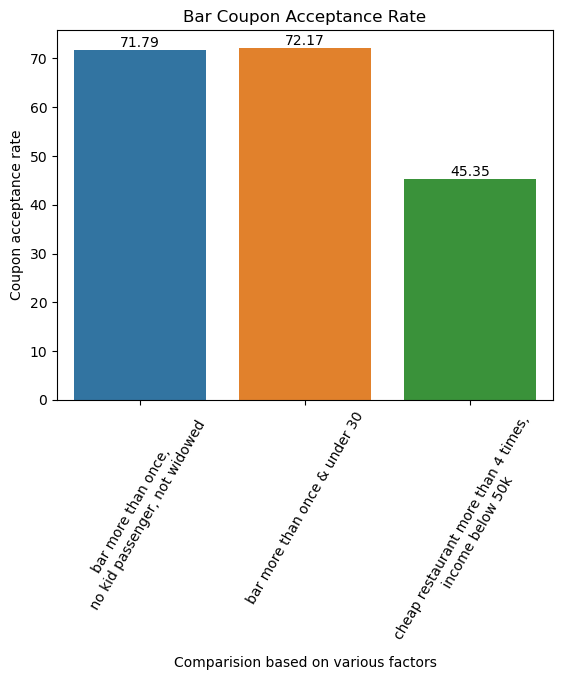

In [2371]:
# Those who went to bar more than once a month & had passengers that were not a kid and were not widowed
t = (data_bar["Bar"].str.contains("|".join(["1~3","4~8", "gt8"])) 
        & data_bar["passenger"].str.contains("|".join(["Friend\(s\)","Partner"]))
        & ~data_bar["maritalStatus"].str.contains("Widowed")).sum()

# Those who went to bar more than once a month, accepted coupon, & had passengers that were not a kid and with occupations other than farming, fishing, forestry
u = (data_bar["Bar"].str.contains("|".join(["1~3","4~8", "gt8"])) 
        & data_bar["passenger"].str.contains("|".join(["Friend\(s\)","Partner"]))
        & ~data_bar["maritalStatus"].str.contains("Widowed")
        & data_bar["Y"] == 1).sum()

# Acceptance rate
v = ((u/t)*100).round(2)
print(f"Acceptance rate of those who went to bar more than once a month, passengers that were not a kid and were not widowed: {v}%")

###

# Those who went to bar more than once a month & under 30
w = (data_bar["Bar"].str.contains("|".join(["1~3","4~8", "gt8"])) 
        & data_bar["age"].str.contains("|".join(["below21","21","26"]))).sum()

# Those who went to bar more than once a month, accepted coupon, & under 30
x = (data_bar["Bar"].str.contains("|".join(["1~3","4~8", "gt8"])) 
        & data_bar["age"].str.contains("|".join(["below21","21","26"]))
        & data_bar["Y"] == 1).sum()

# Acceptance rate
y = ((x/w)*100).round(2)
print(f"Acceptance rate of those who went to bar more than once a month and under 30: {y}%")

###

# Those who went to cheap restaurants more than 4 times a month and income is less than 50K.
za = (data_bar["RestaurantLessThan20"].str.contains("|".join(["4~8", "gt8"])) 
        & data_bar["income"].str.contains("|".join(["Less than \$12500","\$12500 - \$24999","\$25000 - \$37499", "\$37500 - \$49999"]))).sum()

# Those who went to cheap restaurants more than 4 times a month, accepted coupon, and income is less than 50K.
zb = (data_bar["RestaurantLessThan20"].str.contains("|".join(["4~8", "gt8"])) 
        & data_bar["income"].str.contains("|".join(["Less than \$12500","\$12500 - \$24999","\$25000 - \$37499", "\$37500 - \$49999"]))
        & data_bar["Y"] == 1).sum()

# Acceptance rate
zc = ((zb/za)*100).round(2)
print(f"Acceptance rate of those who went to cheap restaurants more than 4 times a month and income under 50k: {zc}%")

# Visualization
temp_data = [['bar more than once, \n no kid passenger, not widowed',v],['bar more than once & under 30', y], ['cheap restaurant more than 4 times, \n income below 50k',zc]]
temp_df = pd.DataFrame(temp_data, columns = ['Comparision based on various factors','Coupon acceptance rate'])
ax = sns.barplot(data = temp_df, x = 'Comparision based on various factors', y = "Coupon acceptance rate")
plt.title("Bar Coupon Acceptance Rate")
plt.xticks(rotation = 60)
ax.bar_label(ax.containers[0])

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [2374]:
# Amongst all coupon categories, the overall acceptance rate for bar coupons was lowest: 41%
# Acceptance rate of those who went to bar 3 or fewer times a month: 64.74%
# Acceptance rate of those who went to bar 4 to 8 times a month: 78.0%
# Acceptance rate of those who went to bar more than 8 times a month: 73.47%
# Acceptance rate of those who went to bar 4 or more times a month: 76.88%
#
# Acceptance rate of those who went to bar more than once a month & over 25: 69.52%
# Acceptance rate of those who went to bar more than once a month & below 25: 67.05%
# Acceptance rate of those who went to bar more than once a month, passengers that were not a kid and with occupations other than farming, fishing, forestry: 71.79%
#
# Acceptance rate of those who went to bar more than once a month, passengers that were not a kid and were not widowed: 71.79%
# Acceptance rate of those who went to bar more than once a month and under 30: 72.17%
# Acceptance rate of those who went to cheap restaurants more than 4 times a month and income under 50k: 45.35%
#
# Key highlights:
# 1. Bar coupons acceptance was less (45.35%) by people who went to cheap restaurants more than 4 times a month and whose income was less than 50k. 
# 2. The coupon acceptance was higher for other categories analyzed above with highest (78%) being by those who went to bar 4 to 8 times a month or by those who went to bar more than once a month and under the age of 30 (72.17%)
# 3. Also, those who went to bar more than once a month and not traveling with kids had higher coupon acceptance rate (71.79%).

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [2377]:
# Creating a new DataFrame with just Restaurant(20-50) coupons
data_res2050 = data[data["coupon"].str.contains("Restaurant\(20-50\)")]
data_res2050.shape

(1492, 23)

In [2379]:
data_res2050.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1492 entries, 14 to 12683
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           1492 non-null   object
 1   passenger             1492 non-null   object
 2   weather               1492 non-null   object
 3   temperature           1492 non-null   int64 
 4   time                  1492 non-null   object
 5   coupon                1492 non-null   object
 6   expiration            1492 non-null   object
 7   gender                1492 non-null   object
 8   age                   1492 non-null   object
 9   maritalStatus         1492 non-null   object
 10  has_children          1492 non-null   int64 
 11  education             1492 non-null   object
 12  occupation            1492 non-null   object
 13  income                1492 non-null   object
 14  Bar                   1492 non-null   object
 15  CoffeeHouse           1492 non-null   obj

In [2381]:
# Proportion of Restaurant(20-50) coupons were accepted

# Check the unique values for column Y and their respective counts

data_res2050["Y"].value_counts()

# Total # of observations
data_res2050.shape[0]

# Calculate the proportion when value of Y is 1 (i.e. coupon accepted)
Coupon_acceptance = data_res2050["Y"].value_counts()[1] / data_res2050.shape[0]
print(f"Proportion of Restaurant(20-50) coupons that were accepted: {Coupon_acceptance.round(4)*100}%")

Proportion of Restaurant(20-50) coupons that were accepted: 44.1%


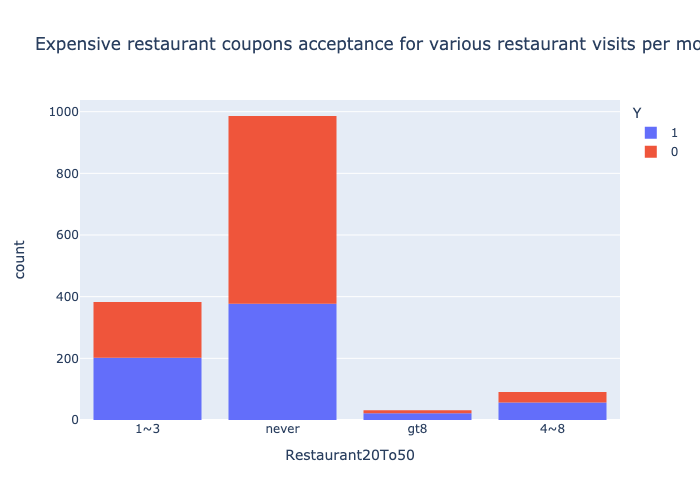

In [2383]:
# Compare the coupon acceptance rate for different # of expensive restaurant visits a month
    
fig3 = px.histogram(data_res2050, x = "Restaurant20To50", color = "Y", title = "Expensive restaurant coupons acceptance for various restaurant visits per month")
fig3.write_image("./images/coupons/fig3.png")
Image(filename="./images/coupons/fig3.png")

Acceptance rate of those who went to restaurant 3 or fewer times a month: 52.74%
Acceptance rate of those who went to restaurant 4 to 8 times a month: 62.64%
Acceptance rate of those who went to restaurant more than 8 times a month: 68.75%
Acceptance rate of those who never went to a restaurant: 38.24%


[Text(0, 0, '38.24'),
 Text(0, 0, '52.74'),
 Text(0, 0, '62.64'),
 Text(0, 0, '68.75')]

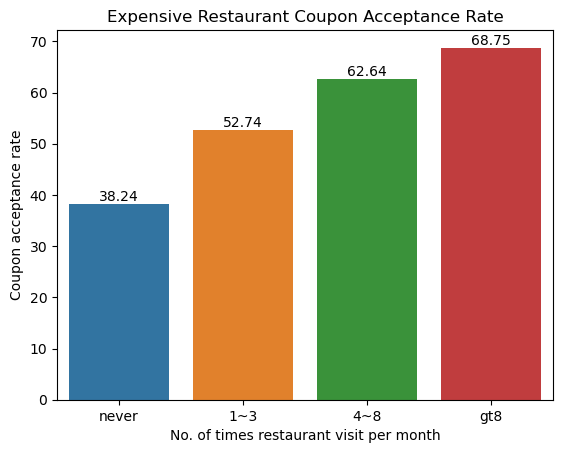

In [2385]:
# Those who went to restaurant 3 or fewer times and accepted coupon
xa = (data_res2050["Restaurant20To50"].str.contains("1~3") & data_res2050["Y"] == 1).sum()

# Those who went to restaurant 3 or fewer times
xb = data_res2050["Restaurant20To50"].str.contains("1~3").sum()

# Acceptance rate of those who went to bar 3 or fewer times a month
xc = ((xa/xb)*100).round(2)
print(f"Acceptance rate of those who went to restaurant 3 or fewer times a month: {xc}%")

###

# Those who went to restaurant 4 to 8 times and accepted coupon
xd = (data_res2050["Restaurant20To50"].str.contains("4~8") & data_res2050["Y"] == 1).sum()

# Those who went to restaurant 4 to 8 times
xe = data_res2050["Restaurant20To50"].str.contains("4~8").sum()

# Acceptance rate of those who went to restaurant 4 to 8 times a month
xf = ((xd/xe)*100).round(2)
print(f"Acceptance rate of those who went to restaurant 4 to 8 times a month: {xf}%")

###

# Those who went to restaurant more than 8 times and accepted coupon
xg = (data_res2050["Restaurant20To50"].str.contains("gt8") & data_res2050["Y"] == 1).sum()

# Those who went to bar more than 8 times
xh = data_res2050["Restaurant20To50"].str.contains("gt8").sum()

# Acceptance rate of those who went to bar more than 8 times a month
xi = ((xg/xh)*100).round(2)
print(f"Acceptance rate of those who went to restaurant more than 8 times a month: {xi}%")

###

# Those who never went to an expensive and accepted coupon
xj = (data_res2050["Restaurant20To50"].str.contains("never") & data_res2050["Y"] == 1).sum()

# Those who never went to an expensive restaurant
xk = data_res2050["Restaurant20To50"].str.contains("never").sum()

# Acceptance rate of those who went to bar more than 8 times a month
xl = ((xj/xk)*100).round(2)
print(f"Acceptance rate of those who never went to a restaurant: {xl}%")

###

# Visualization
temp_data = [['never',xl],['1~3',xc],['4~8', xf],['gt8', xi]]
temp_df = pd.DataFrame(temp_data, columns = ['No. of times restaurant visit per month','Coupon acceptance rate'])
#temp_df.plot(kind = "bar", x = 'No. of times restaurant visit per month', y = "Coupon acceptance rate")
ax = sns.barplot(data = temp_df, x = 'No. of times restaurant visit per month', y = "Coupon acceptance rate")
plt.title("Expensive Restaurant Coupon Acceptance Rate")
ax.bar_label(ax.containers[0])

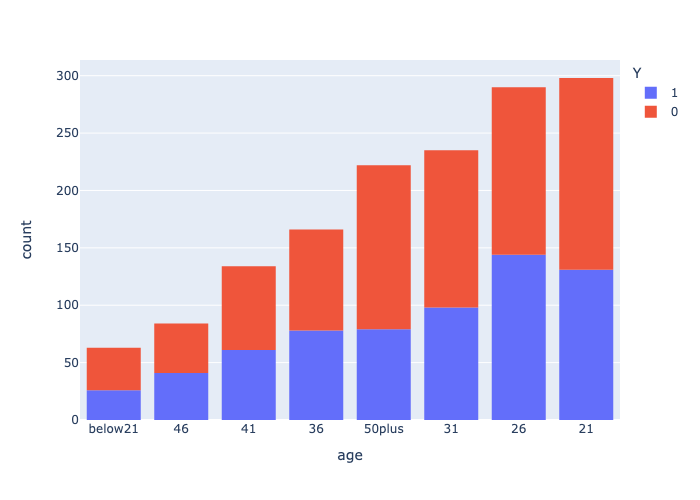

In [2387]:
# Compare coupon acceptance for different age groups
fig4 = px.histogram(data_res2050, x = "age", color = "Y").update_xaxes(categoryorder = "total ascending")
fig4.write_image("./images/coupons/fig4.png")
Image(filename="./images/coupons/fig4.png")

In [2389]:
# Acceptance rate by age
acceptance_rate = data_res2050.groupby('age').apply(lambda x: ((x['Y'].sum() / len(x))*100).round(2)).reset_index(name='acceptance_rate')
print(acceptance_rate)

       age  acceptance_rate
0       21            43.96
1       26            49.66
2       31            41.70
3       36            46.99
4       41            45.52
5       46            48.81
6   50plus            35.59
7  below21            41.27


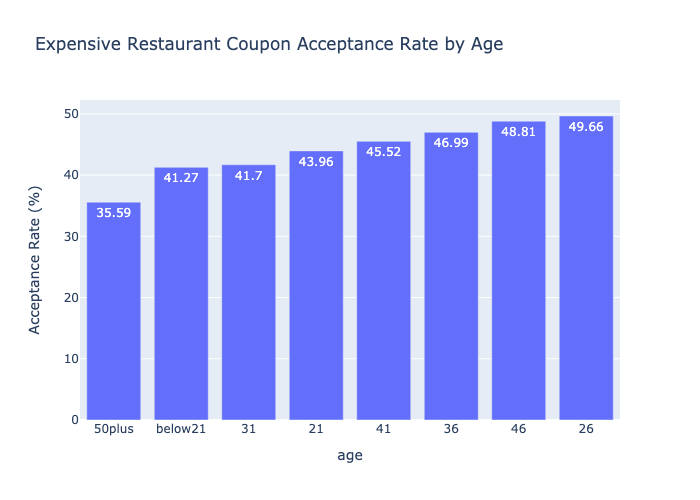

In [2391]:
# Visualization
fig5 = px.bar(acceptance_rate, x='age', y='acceptance_rate', text='acceptance_rate', 
       labels={'acceptance_rate': 'Acceptance Rate (%)'},
       title = "Expensive Restaurant Coupon Acceptance Rate by Age").update_xaxes(categoryorder='total ascending')
fig5.write_image("./images/coupons/fig5.png")
Image(filename="./images/coupons/fig5.png")

In [2393]:
# Conclusion: The acceptance rate for coupons just based on age group is fairly low for all age groups.
# A better analysis would be to compare acceptance rate for different age groups but for those 
# who visit expensive restaurant at least once a month

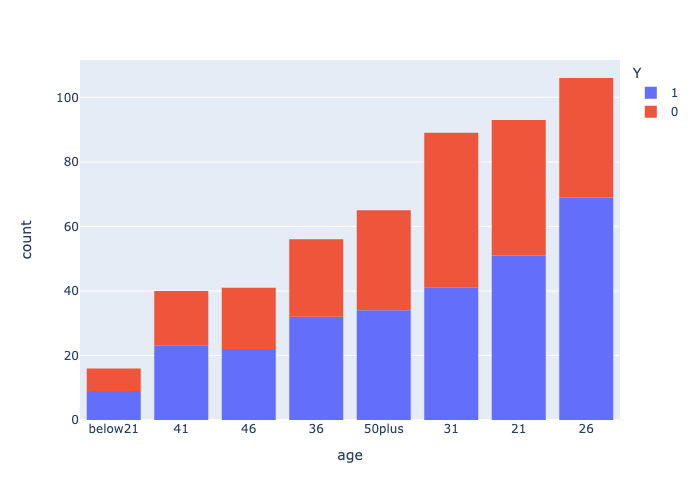

In [2395]:
# Compare coupon acceptance for different age groups and for those who visit expensive restaurants at least once a month
data_res2050_gt1 = data_res2050[data_res2050["Restaurant20To50"].str.contains("|".join(["1~3","4~8", "gt8"]))]

fig6 = px.histogram(data_res2050_gt1, x = "age", color = "Y").update_xaxes(categoryorder = "total ascending")
fig6.write_image("./images/coupons/fig6.png")
Image(filename="./images/coupons/fig6.png")

In [2397]:
# Acceptance rate by age
acceptance_rate = data_res2050_gt1.groupby('age').apply(lambda x: ((x['Y'].sum() / len(x))*100).round(2)).reset_index(name='acceptance_rate')
print(acceptance_rate)

       age  acceptance_rate
0       21            54.84
1       26            65.09
2       31            46.07
3       36            57.14
4       41            57.50
5       46            53.66
6   50plus            52.31
7  below21            56.25


In [2399]:
mean_acceptance_rate = acceptance_rate['acceptance_rate'].mean()
print (f"Mean acceptance rate: {mean_acceptance_rate.round(2)}")

Mean acceptance rate: 55.36


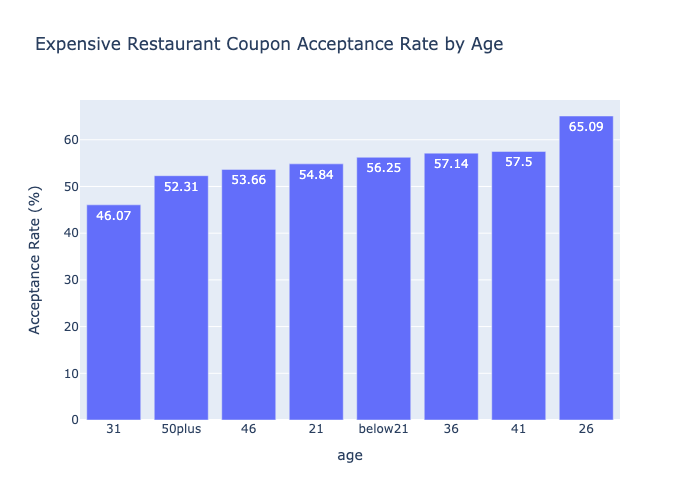

In [2401]:
# Visualization
fig7 = px.bar(acceptance_rate, x='age', y='acceptance_rate', text='acceptance_rate', 
       labels={'acceptance_rate': 'Acceptance Rate (%)'},
       title = "Expensive Restaurant Coupon Acceptance Rate by Age").update_xaxes(categoryorder='total ascending')
fig7.write_image("./images/coupons/fig7.png")
Image(filename="./images/coupons/fig7.png")

In [2403]:
# Conclusion: The acceptance rate for coupons who visit expensive restaurant at least once a month is highest for age 26 (65.09%)
# but fairly similar for other age groups

Acceptance rate of those who went to restaurant more than once a month & over 25: 55.67%
Acceptance rate of those who went to restaurant more than once a month & below 25: 55.05%


[Text(0, 0, '55.67'), Text(0, 0, '55.05')]

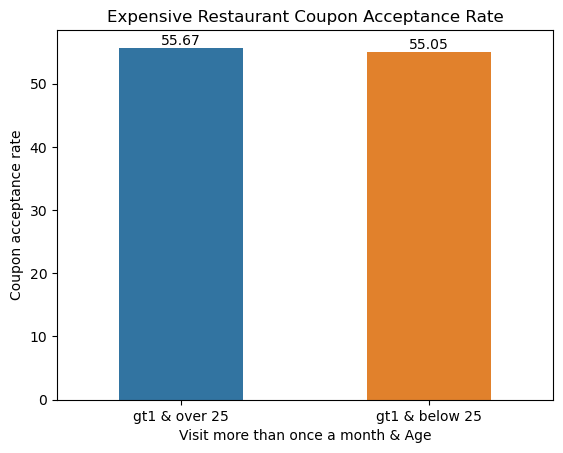

In [2405]:

# Compare the acceptance rate between drivers who go to an expensive restaurant more than once a month and are over the age of 25 to all others.
# Those who went to restaurant more than once a month & over 25
xn_gt25 = (data_res2050["Restaurant20To50"].str.contains("|".join(["1~3","4~8", "gt8"])) 
           & data_res2050["age"].str.contains("|".join(["26","31","36","41","46","50plus"]))).sum()

# Those who went to restaurant more than once a month, accepted coupon and over 25
xo_gt25 = (data_res2050["Restaurant20To50"].str.contains("|".join(["1~3", "4~8", "gt8"])) 
           & data_res2050["age"].str.contains("|".join(["26","31","36","41","46","50plus"])) 
           & data_res2050["Y"] == 1).sum()

# Acceptance rate of those who went to restaurant more than once a month and over 25
xp_gt25 = ((xo_gt25/xn_gt25)*100).round(2)
print(f"Acceptance rate of those who went to restaurant more than once a month & over 25: {xp_gt25}%")

###

# Those who went to restaurant more than once a month & under 25
xn_lt25 = (data_res2050["Restaurant20To50"].str.contains("|".join(["1~3","4~8", "gt8"])) 
           & data_res2050["age"].str.contains("|".join(["below21","21"]))).sum()

# Those who went to bar more than once a month, accepted coupon and under 25
xo_lt25 = (data_res2050["Restaurant20To50"].str.contains("|".join(["1~3", "4~8", "gt8"])) 
           & data_res2050["age"].str.contains("|".join(["below21","21"])) 
           & data_res2050["Y"] == 1).sum()

# Acceptance rate of those who went to restaurant more than once a month and under 25
xp_lt25 = ((xo_lt25/xn_lt25)*100).round(2)
print(f"Acceptance rate of those who went to restaurant more than once a month & below 25: {xp_lt25}%")

# Visualization
temp_data = [['gt1 & over 25',xp_gt25],['gt1 & below 25', xp_lt25]]
temp_df = pd.DataFrame(temp_data, columns = ['Visit more than once a month & Age','Coupon acceptance rate'])
ax = sns.barplot(data = temp_df, x = 'Visit more than once a month & Age', y = "Coupon acceptance rate", width = 0.5)
plt.title("Expensive Restaurant Coupon Acceptance Rate")
ax.bar_label(ax.containers[0])

In [2407]:
# Conclusion: There wasn't any significant difference (55.67% vs. 55.05%) in the coupon acceptance rate for those who 
# visit expensive restaurants more than once a month when compared over age 25 and below age 25.

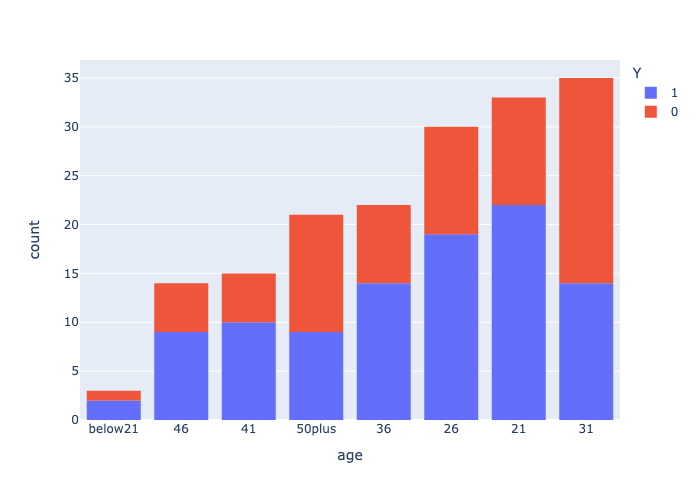

In [2409]:
# Compare coupon acceptance for different age groups and for those who visit expensive restaurants at least once a month 
# and when not traveling alone
data_res2050_gt1 = data_res2050[data_res2050["Restaurant20To50"].str.contains("|".join(["1~3","4~8", "gt8"]))
                                & ~data_res2050["passenger"].str.contains("Alone")]

fig8 = px.histogram(data_res2050_gt1, x = "age", color = "Y").update_xaxes(categoryorder = "total ascending")
fig8.write_image("./images/coupons/fig8.png")
Image(filename="./images/coupons/fig8.png")

In [2411]:
# Acceptance rate by age
acceptance_rate = data_res2050_gt1.groupby('age').apply(lambda x: ((x['Y'].sum() / len(x))*100).round(2)).reset_index(name='acceptance_rate')
print(acceptance_rate)

       age  acceptance_rate
0       21            66.67
1       26            63.33
2       31            40.00
3       36            63.64
4       41            66.67
5       46            64.29
6   50plus            42.86
7  below21            66.67


In [2413]:
mean_acceptance_rate = acceptance_rate['acceptance_rate'].mean()
print (f"Mean acceptance rate: {mean_acceptance_rate.round(2)}")

Mean acceptance rate: 59.27


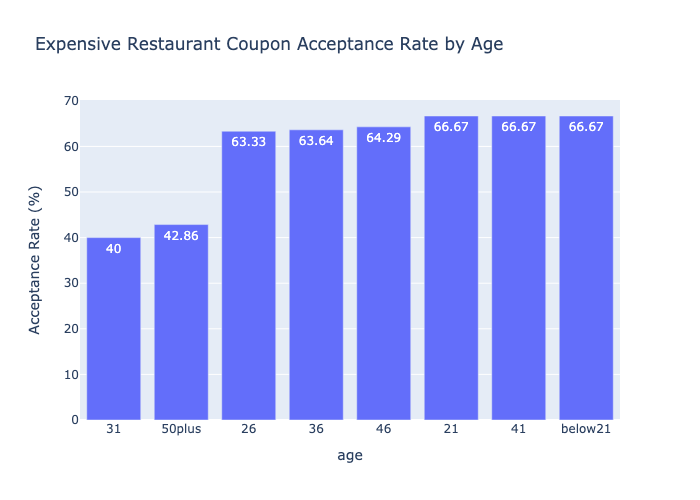

In [2415]:
# Visualization
fig9 = px.bar(acceptance_rate, x='age', y='acceptance_rate', text='acceptance_rate', 
       labels={'acceptance_rate': 'Acceptance Rate (%)'},
       title = "Expensive Restaurant Coupon Acceptance Rate by Age").update_xaxes(categoryorder='total ascending')
fig9.write_image("./images/coupons/fig9.png")
Image(filename="./images/coupons/fig9.png")

In [2417]:
# Conclusion: When drivers are not traveling alone, the coupon acceptance rate for expensive restaurants is much higher
# and for those who visit expensive restaurant at least once a month

In [2419]:
# Compare coupon acceptance for different age groups and gender and for those who visit expensive restaurants at least once a month 
# and when not traveling alone
acceptance_rate = data_res2050_gt1.groupby(['age','gender']).apply(lambda x: ((x['Y'].sum() / len(x))*100).round(2)).reset_index(name='acceptance_rate')
print(acceptance_rate)

        age  gender  acceptance_rate
0        21  Female            66.67
1        21    Male            66.67
2        26  Female            66.67
3        26    Male            61.11
4        31  Female            33.33
5        31    Male            50.00
6        36  Female            70.00
7        36    Male            58.33
8        41  Female            20.00
9        41    Male            90.00
10       46  Female           100.00
11       46    Male            50.00
12   50plus  Female            35.71
13   50plus    Male            57.14
14  below21  Female           100.00
15  below21    Male            50.00


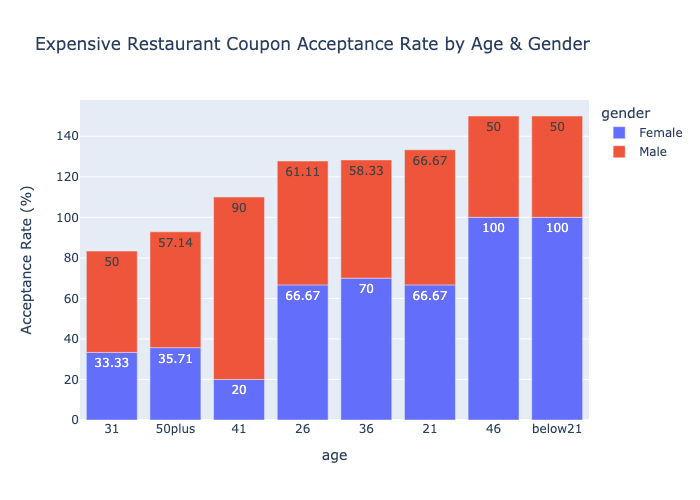

In [2421]:
# Visualization
fig10 = px.bar(acceptance_rate, x='age', y='acceptance_rate', color = 'gender', text='acceptance_rate', 
       labels={'acceptance_rate': 'Acceptance Rate (%)'},
       title = "Expensive Restaurant Coupon Acceptance Rate by Age & Gender").update_xaxes(categoryorder='total ascending')
fig10.write_image("./images/coupons/fig10.png")
Image(filename="./images/coupons/fig10.png")

In [2423]:
# Conclusion: For some age groups, females had higher coupon acceptance rate 
# and for some age groups males had higher coupon acceptance rate

In [2425]:
# Compare coupon acceptance based on gender and for those who visit expensive restaurants at least once a month and when not traveling alone

acceptance_rate = data_res2050_gt1.groupby('gender').apply(lambda x: ((x['Y'].sum() / len(x))*100).round(2)).reset_index(name='acceptance_rate')
print(acceptance_rate)

   gender  acceptance_rate
0  Female            53.41
1    Male            61.18


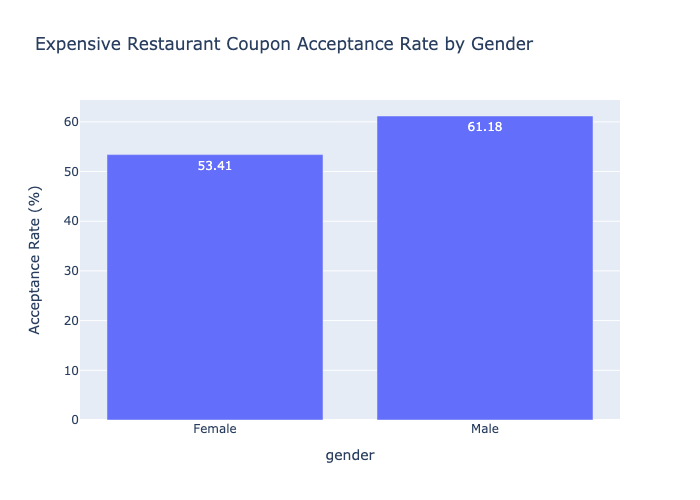

In [2427]:
# Visualization
fig11 = px.bar(acceptance_rate, x='gender', y='acceptance_rate', text='acceptance_rate', 
       labels={'acceptance_rate': 'Acceptance Rate (%)'},
       title = "Expensive Restaurant Coupon Acceptance Rate by Gender").update_xaxes(categoryorder='total ascending')
fig11.write_image("./images/coupons/fig11.png")
Image(filename="./images/coupons/fig11.png")

In [2429]:
#Conclusion: Overall, coupon acceptance rate for males is higher (61.18%) than females (53.41%) for those who visit expensive restaurants 
# at least once a month and when not traveling alone

In [2431]:
# Compare coupon acceptance based on gender and for those who visit expensive restaurants at least once a month 
# and when not traveling alone and also who went to a coffee place at least once a month

data_res2050_gt2 = data_res2050_gt1[data_res2050_gt1["CoffeeHouse"].str.contains("|".join(["1~3","4~8", "gt8"]))]

In [2433]:
acceptance_rate = data_res2050_gt2.groupby('gender').apply(lambda x: ((x['Y'].sum() / len(x))*100).round(2)).reset_index(name='acceptance_rate')
print(acceptance_rate)

   gender  acceptance_rate
0  Female            55.00
1    Male            63.16


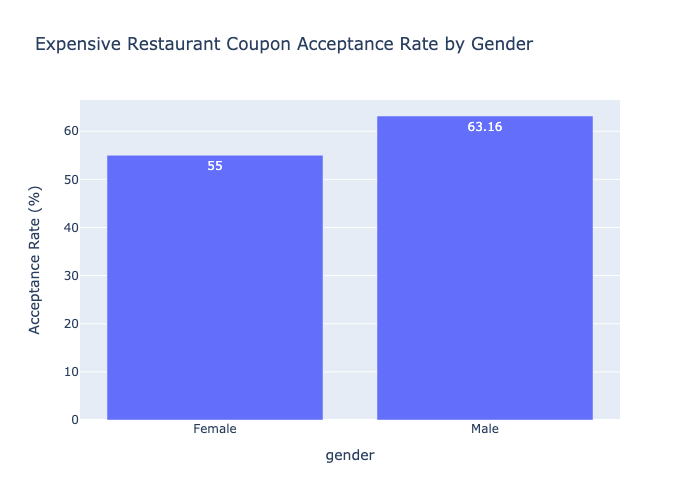

In [2435]:
# Visualization
fig12 = px.bar(acceptance_rate, x='gender', y='acceptance_rate', text='acceptance_rate', 
       labels={'acceptance_rate': 'Acceptance Rate (%)'},
       title = "Expensive Restaurant Coupon Acceptance Rate by Gender").update_xaxes(categoryorder='total ascending')
fig12.write_image("./images/coupons/fig12.png")
Image(filename="./images/coupons/fig12.png")

In [2437]:
#Conclusion: The expensive restaurant coupon acceptance rate increased for both males (63.16%) and females (55%) for those who also went to a 
# coffee place at least once a month in addition to going to an expensive restaurant at least once a month and when not traveling alone

In [2439]:
# Compare coupon acceptance for different age groups and gender and for those who visit expensive restaurants at least once a month 
# and when not traveling alone and also when visiting a coffee place at least once a month
acceptance_rate = data_res2050_gt2.groupby(['age','gender']).apply(lambda x: ((x['Y'].sum() / len(x))*100).round(2)).reset_index(name='acceptance_rate')
print(acceptance_rate)

        age  gender  acceptance_rate
0        21  Female            63.16
1        21    Male           100.00
2        26  Female            57.14
3        26    Male            61.54
4        31  Female            16.67
5        31    Male            33.33
6        36  Female           100.00
7        36    Male            33.33
8        41  Female            33.33
9        41    Male            80.00
10       46  Female           100.00
11       46    Male            66.67
12   50plus  Female            37.50
13   50plus    Male            60.00
14  below21  Female           100.00


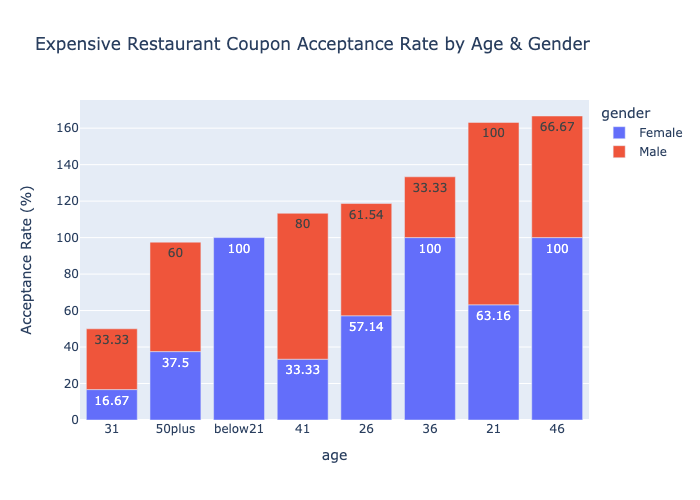

In [2441]:
# Visualization
fig13 = px.bar(acceptance_rate, x='age', y='acceptance_rate', color = 'gender', text='acceptance_rate', 
       labels={'acceptance_rate': 'Acceptance Rate (%)'},
       title = "Expensive Restaurant Coupon Acceptance Rate by Age & Gender").update_xaxes(categoryorder='total ascending')
fig13.write_image("./images/coupons/fig13.png")
Image(filename="./images/coupons/fig13.png")

In [2443]:
# Conclusion: The expensive restaurant coupon acceptance rate for all age groups is generally higher for those who also
# went to a coffee shop in additon to an expensive restaurant at least once a month

In [2445]:
# Compare coupon acceptance for different times and for those who visit expensive restaurants at least once a month

# Acceptance rate by time
acceptance_rate = data_res2050_gt1.groupby('time').apply(lambda x: ((x['Y'].sum() / len(x))*100).round(2)).reset_index(name='acceptance_rate')
print(acceptance_rate)

   time  acceptance_rate
0  10AM            78.57
1  10PM            41.07
2   2PM            59.02
3   6PM            50.00


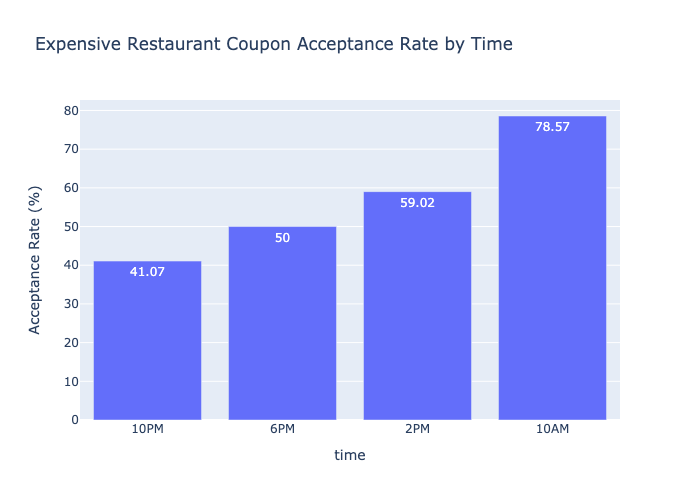

In [2447]:
# Visualization

fig14 = px.bar(acceptance_rate, x='time', y='acceptance_rate', text='acceptance_rate', 
           labels={'acceptance_rate': 'Acceptance Rate (%)'},
           title = "Expensive Restaurant Coupon Acceptance Rate by Time").update_xaxes(categoryorder='total ascending')
fig14.write_image("./images/coupons/fig14.png")
Image(filename="./images/coupons/fig14.png")

In [2449]:
# Conclusion: For those who visit expensive restaurants at least once a month, the expensive restaurant coupon acceptance rate is highest 
# when the coupons are sent earlier in the day, with 10am being the highest (78.57%) and the coupon acceptance goes down as the day 
# progresses with 10 pm being the lowest (41.07%)

In [2451]:
# Key conclusions:
# Amongst all coupon categories, the overall acceptance rate for bar coupons was lowest (41%), followed by expensive restaurant coupons (44.1%)
#
# The acceptance rate of coupon is positively correlated with the # of visits per month: 
#    Acceptance rate of those who never went to a restaurant: 38.24% 
#    Acceptance rate of those who went to restaurant 3 or fewer times a month: 52.74%
#    Acceptance rate of those who went to restaurant 4 to 8 times a month: 62.64%
#    Acceptance rate of those who went to restaurant more than 8 times a month: 68.75%
#
# Analyzing coupon acceptance based solely on the age groups isn't very effective and was low when analyzed across different age groups.
# However, the acceptance rate was higher when the drivers were not traveling alone.
#    There wasn't any significant difference in the coupon acceptance rate for those who visit expensive restaurants more than once a 
#    month when compared over age 25 (55.67%) and below age 25 (55.05%). However, when analyzed further by different age groups, 
#    it was highest for age 26 (65.09%).
#    When drivers are not traveling alone, the coupon acceptance rate for expensive restaurants is much higher and for those who visit 
#    expensive restaurant at least once a month. The mean acceptance rate across different age groups increased from 55.86% to 59.27% 
#    when not traveling alone.
#
# The coupon acceptance rate for males is higher (61.18%) than females (53.41%) for those who visit expensive restaurants at least once 
# a month and when not traveling alone.
#
# The expensive restaurant coupon acceptance rate increased for both males (63.16%) and females (55%) for those who also went to a 
# coffee place at least once a month in addition to going to an expensive restaurant at least once a month and when not traveling alone.
#
# For those who visit expensive restaurants at least once a month, the expensive restaurant coupon acceptance rate is highest 
# when the coupons are sent earlier in the day, with 10am being the highest (78.57%) and the coupon acceptance goes down as the day 
# progresses with 10 pm being the lowest (41.07%).